# Интерпретация. Практическая работа

## Цель практической работы

Научиться интерпретировать модели кластеризации.

## Что входит в практическую работу


1. Загрузить данные и провести разведочный анализ.
2. Предположить оптимальное количество кластеров.
3. Очистить и подготовить данные для использования в моделях машинного обучения.
4. Построить модель кластеризации с помощью библиотеки Scikit-learn и вычислить оптимальное количество кластеров.
5. Визуализировать результаты кластеризации.
6. Интерпретировать полученные результаты.
7. Подкрепить выводы интерпретации визуализациями.

## Что оценивается 

* Выполнены все этапы работы.
* Сделаны выводы по результатам разведочного анализа данных.
* Выполнена и обоснована подготовка данных.
* Выбор количества кластеров обоснован и подкреплён визуализацией. 
* Выбор гиперпараметров метода понижения размерности обоснован.
* Интерпретация кластеров подкреплена расчётами и визуализацией. 



## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (.ipynb) или ссылку на него.

# Задача

Пусть у нас имеется некоторый набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID: уникальный идентификатор клиента.
* Year_Birth: год рождения клиента.
* Dt_Customer: дата регистрации клиента на сайте.
* Recency: количество дней с момента последней покупки клиента.
* Complain: 1, если клиент жаловался на обслуживание за последние два года, 0 в противном случае.
* MntFruits: сумма, потраченная на фрукты за последние два года.
* MntMeatProducts: сумма, потраченная на мясо за последние два года.
* MntFishProducts: сумма, потраченная на рыбу за последние два года.
* MntSweetProducts: сумма, потраченная на сладости за последние два года.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 в противном случае.
* NumWebPurchases: количество покупок, совершённых через сайт.
* NumStorePurchases: количество покупок, совершённых непосредственно в магазинах.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы покупателей. Подготовьте результаты своей работы для демонстрации заказчику, не погружённому в машинное обучение.



# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [29]:
df = pd.read_csv('14.4 marketing campaign.csv')
df

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,13-06-2013,46,43,182,42,118,9,4,0
2236,4001,1946,10-06-2014,56,0,30,0,0,8,5,0
2237,7270,1981,25-01-2014,91,48,217,32,12,2,13,0
2238,8235,1956,24-01-2014,8,30,214,80,30,6,10,0


In [30]:
# Удалим дубликаты
df = df.drop_duplicates()
df

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,13-06-2013,46,43,182,42,118,9,4,0
2236,4001,1946,10-06-2014,56,0,30,0,0,8,5,0
2237,7270,1981,25-01-2014,91,48,217,32,12,2,13,0
2238,8235,1956,24-01-2014,8,30,214,80,30,6,10,0


In [31]:
# Проверим на пропуски
df.isna().sum() * 100 / len(df)

ID                   0.0
Year_Birth           0.0
Dt_Customer          0.0
Recency              0.0
MntFruits            0.0
MntMeatProducts      0.0
MntFishProducts      0.0
MntSweetProducts     0.0
NumWebPurchases      0.0
NumStorePurchases    0.0
Response             0.0
dtype: float64

In [32]:
# Дату заменим на количество дней с момента регистрации
df['Dt_Customer'] = (pd.to_datetime("today") - pd.to_datetime(df['Dt_Customer'], format= "%d-%m-%Y")).dt.days
df

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,3818,58,88,546,172,88,8,4,1
1,2174,1954,3268,38,1,6,2,1,1,2,0
2,4141,1965,3467,26,49,127,111,21,8,10,0
3,6182,1984,3294,26,4,20,10,3,2,4,0
4,5324,1981,3316,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,3536,46,43,182,42,118,9,4,0
2236,4001,1946,3174,56,0,30,0,0,8,5,0
2237,7270,1981,3310,91,48,217,32,12,2,13,0
2238,8235,1956,3311,8,30,214,80,30,6,10,0


In [33]:
# Год рождения заменим на возраст
df['Year_Birth'] = pd.to_datetime("today").year - df['Year_Birth']
df

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,66,3818,58,88,546,172,88,8,4,1
1,2174,69,3268,38,1,6,2,1,1,2,0
2,4141,58,3467,26,49,127,111,21,8,10,0
3,6182,39,3294,26,4,20,10,3,2,4,0
4,5324,42,3316,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,56,3536,46,43,182,42,118,9,4,0
2236,4001,77,3174,56,0,30,0,0,8,5,0
2237,7270,42,3310,91,48,217,32,12,2,13,0
2238,8235,67,3311,8,30,214,80,30,6,10,0


In [34]:
# Удалим стобец с ID
df = df.drop(columns=['ID'])
df

,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,66,3818,58,88,546,172,88,8,4,1
1,69,3268,38,1,6,2,1,1,2,0
2,58,3467,26,49,127,111,21,8,10,0
3,39,3294,26,4,20,10,3,2,4,0
4,42,3316,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...
2235,56,3536,46,43,182,42,118,9,4,0
2236,77,3174,56,0,30,0,0,8,5,0
2237,42,3310,91,48,217,32,12,2,13,0
2238,67,3311,8,30,214,80,30,6,10,0


In [35]:
# Hайдем есть ли аномальные значения
def calculate_outliers(data, column):
    q25 = data[column].quantile(0.25)
    q75 = data[column].quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries
for i in df.columns:
    out = calculate_outliers(df, i)
    anomaly_count = len(df[(df[i] > out[1]) | (df[i] < out[0])])
    print (f'Количество аномалий в столбце {i}: {anomaly_count}')

Количество аномалий в столбце Year_Birth: 3
Количество аномалий в столбце Dt_Customer: 0
Количество аномалий в столбце Recency: 0
Количество аномалий в столбце MntFruits: 227
Количество аномалий в столбце MntMeatProducts: 175
Количество аномалий в столбце MntFishProducts: 223
Количество аномалий в столбце MntSweetProducts: 248
Количество аномалий в столбце NumWebPurchases: 4
Количество аномалий в столбце NumStorePurchases: 0
Количество аномалий в столбце Response: 334


C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


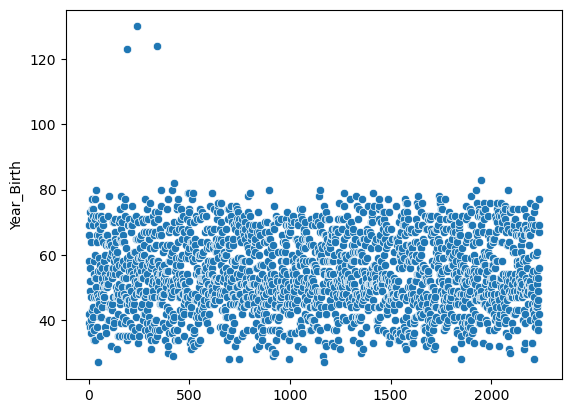

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


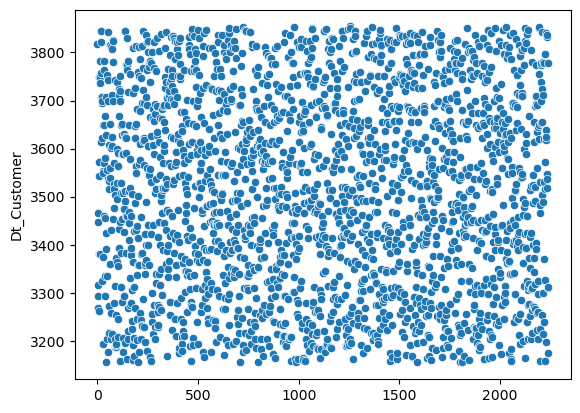

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


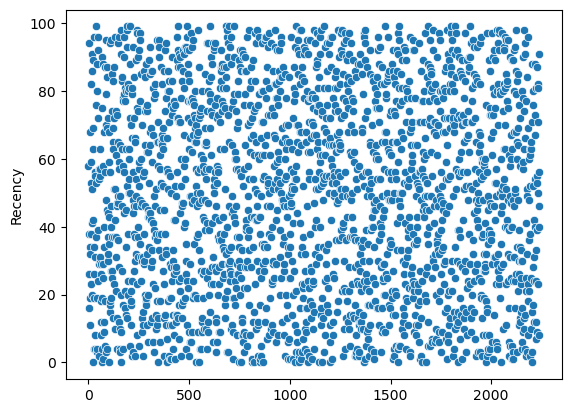

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


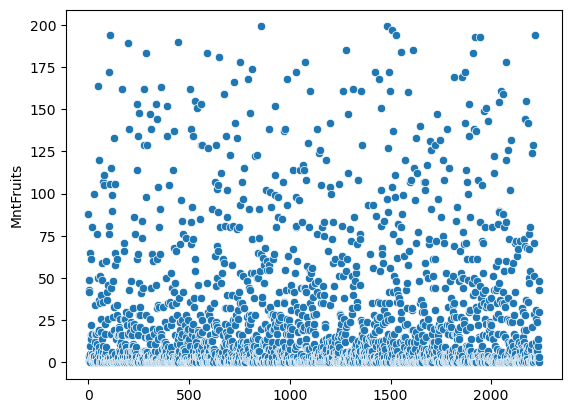

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


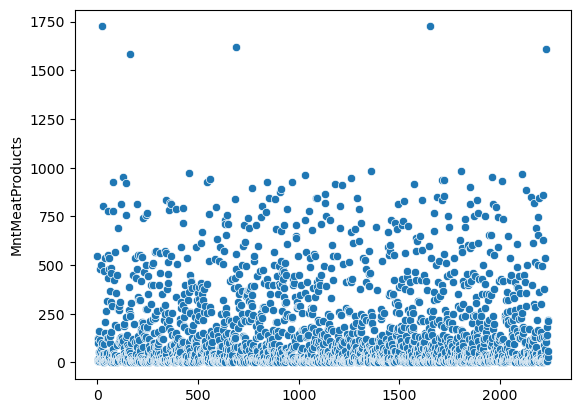

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


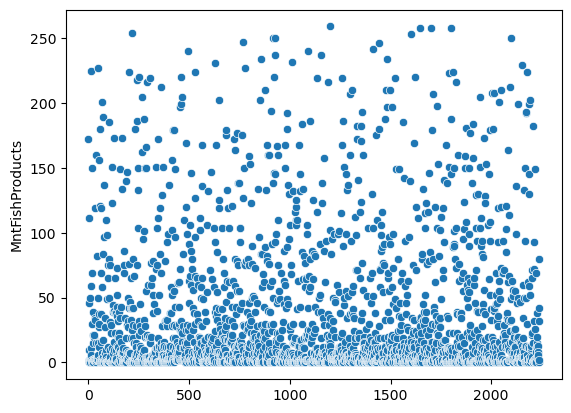

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


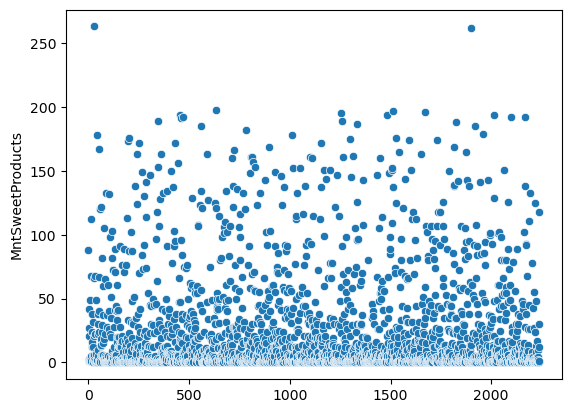

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


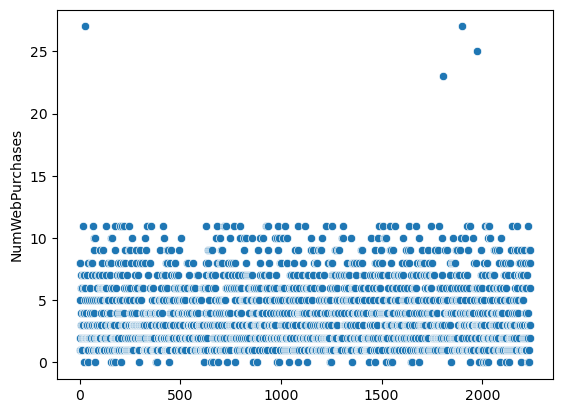

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


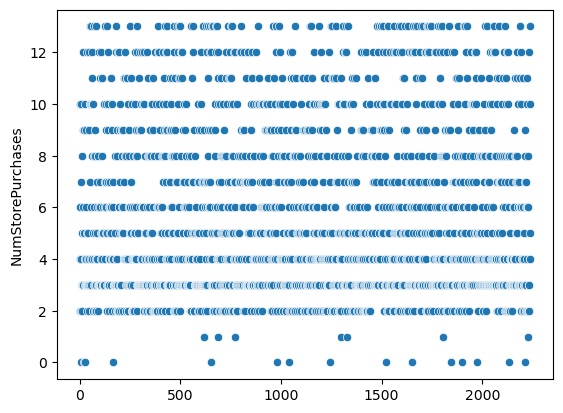

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


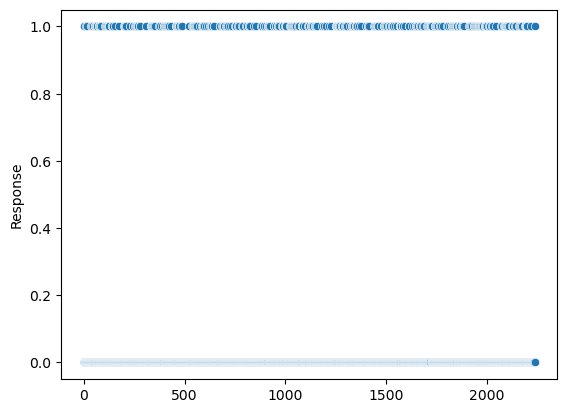

In [36]:
for i in df.columns:
    sns.scatterplot(df.index, df[i]);
    plt.show()

Рассмотрим данные по колонкам Year_Birth, MntMeatProducts, MntSweetProducts, NumWebPurchases более подробно

In [37]:
out = calculate_outliers(df, 'Year_Birth')
df_Year_Birth_out = df[(df.Year_Birth > out[1]) | (df.Year_Birth < out[0])].sort_values(by = 'Year_Birth')
df_Year_Birth_out

,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
192,123,3431,99,6,8,7,4,2,2,0
339,124,3431,36,144,562,104,64,4,4,0
239,130,3198,23,0,5,7,0,1,2,0


Полученные значения явно являются выбросами заменим их на среднее значение

In [38]:
df.loc[(df.Year_Birth > out[1]), 'Year_Birth'] = int(df['Year_Birth'].mean())


In [39]:
out = calculate_outliers(df, 'MntMeatProducts')
df_MntMeatProducts_out = df[(df.MntMeatProducts > out[1]) | (df.MntMeatProducts < out[0])].sort_values(by = 'MntMeatProducts', ascending=False)
df_MntMeatProducts_out.head(20)


,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
21,44,3694,42,1,1725,1,1,0,0,0
1653,46,3581,13,0,1725,2,1,0,0,0
687,41,3849,21,16,1622,17,3,0,1,0
2228,45,3841,53,2,1607,12,4,0,1,0
164,50,3275,98,2,1582,1,2,0,0,0
1358,60,3337,85,129,984,193,37,5,5,0
1808,67,3217,2,51,981,224,23,4,6,1
456,57,3807,44,24,974,197,194,7,9,1
2109,62,3805,89,59,968,51,79,5,12,1
1031,52,3683,58,172,961,125,115,8,5,1


In [40]:
# Пять наиболее больших значений не вызывают доверия - удалим их
df = df[df['MntMeatProducts'] < 1000]
df

,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,66,3818,58,88,546,172,88,8,4,1
1,69,3268,38,1,6,2,1,1,2,0
2,58,3467,26,49,127,111,21,8,10,0
3,39,3294,26,4,20,10,3,2,4,0
4,42,3316,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...
2235,56,3536,46,43,182,42,118,9,4,0
2236,77,3174,56,0,30,0,0,8,5,0
2237,42,3310,91,48,217,32,12,2,13,0
2238,67,3311,8,30,214,80,30,6,10,0


In [41]:
out = calculate_outliers(df, 'MntSweetProducts')
df_MntSweetProducts_out = df[(df.MntSweetProducts > out[1]) | (df.MntSweetProducts < out[0])].sort_values(by = 'MntSweetProducts', ascending=False)
df_MntSweetProducts_out.head(20)

,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
27,37,3649,19,1,3,3,263,27,0,0
1898,78,3187,9,2,3,1,262,27,0,0
634,50,3592,12,22,732,42,198,6,7,1
1513,37,3218,1,42,706,73,197,4,9,0
1671,72,3452,66,107,768,33,196,5,6,0
1253,51,3445,92,27,421,13,195,7,5,0
456,57,3807,44,24,974,197,194,7,9,1
2012,46,3482,79,43,735,40,194,7,9,1
1484,47,3851,50,97,259,197,194,7,6,0
2168,39,3343,91,144,133,94,192,4,5,0


In [42]:
# Два наиболее больших значений не вызывают доверия - удалим их
df = df[df['MntSweetProducts'] < 200]
df

,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,66,3818,58,88,546,172,88,8,4,1
1,69,3268,38,1,6,2,1,1,2,0
2,58,3467,26,49,127,111,21,8,10,0
3,39,3294,26,4,20,10,3,2,4,0
4,42,3316,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...
2235,56,3536,46,43,182,42,118,9,4,0
2236,77,3174,56,0,30,0,0,8,5,0
2237,42,3310,91,48,217,32,12,2,13,0
2238,67,3311,8,30,214,80,30,6,10,0


In [43]:
out = calculate_outliers(df, 'NumWebPurchases')
df_NumWebPurchases_out = df[(df.NumWebPurchases > out[1]) | (df.NumWebPurchases < out[0])].sort_values(by = 'NumWebPurchases', ascending=False)
df_NumWebPurchases_out

,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
1975,54,3422,0,4,12,2,4,25,0,0
1806,57,3359,92,4,33,5,2,23,1,0


In [44]:
# Два наиболее больших значений не вызывают доверия - удалим их
df = df[df['NumWebPurchases']<20]
df

,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,66,3818,58,88,546,172,88,8,4,1
1,69,3268,38,1,6,2,1,1,2,0
2,58,3467,26,49,127,111,21,8,10,0
3,39,3294,26,4,20,10,3,2,4,0
4,42,3316,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...
2235,56,3536,46,43,182,42,118,9,4,0
2236,77,3174,56,0,30,0,0,8,5,0
2237,42,3310,91,48,217,32,12,2,13,0
2238,67,3311,8,30,214,80,30,6,10,0


# Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Поскольку данных может быть настолько много, что построение одной модели будет занимать несколько часов, важно уметь примерно представлять количество кластеров до запуска обучения модели.

На основе проведённого разведочного анализа данных предположите, какое количество кластеров будет оптимальным, и аргументируйте своё предположение.

_Напишите ваш ответ ниже_


На основании разведочного анализа данных определить количество кластеров крайне затруднительно, т.к. количество признаков  велико.

# Задание 3

Выполните очистку и подготовку данных для дальнейшего использования при построении моделей машинного обучения. Аргументируйте выбранные шаги подготовки данных. 

Очистку данных я частично выполнил выше. На данном этапе создам новые признаки.

In [45]:
df['MntProducts'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']
df

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_4436\4206502636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MntProducts'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']


,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,MntProducts
0,66,3818,58,88,546,172,88,8,4,1,894
1,69,3268,38,1,6,2,1,1,2,0,10
2,58,3467,26,49,127,111,21,8,10,0,308
3,39,3294,26,4,20,10,3,2,4,0,37
4,42,3316,94,43,118,46,27,5,6,0,234
...,...,...,...,...,...,...,...,...,...,...,...
2235,56,3536,46,43,182,42,118,9,4,0,385
2236,77,3174,56,0,30,0,0,8,5,0,30
2237,42,3310,91,48,217,32,12,2,13,0,309
2238,67,3311,8,30,214,80,30,6,10,0,354


In [46]:
df['Purchases'] = df['NumWebPurchases'] + df['NumStorePurchases']
df

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_4436\4033347092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purchases'] = df['NumWebPurchases'] + df['NumStorePurchases']


,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,MntProducts,Purchases
0,66,3818,58,88,546,172,88,8,4,1,894,12
1,69,3268,38,1,6,2,1,1,2,0,10,3
2,58,3467,26,49,127,111,21,8,10,0,308,18
3,39,3294,26,4,20,10,3,2,4,0,37,6
4,42,3316,94,43,118,46,27,5,6,0,234,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,3536,46,43,182,42,118,9,4,0,385,13
2236,77,3174,56,0,30,0,0,8,5,0,30,13
2237,42,3310,91,48,217,32,12,2,13,0,309,15
2238,67,3311,8,30,214,80,30,6,10,0,354,16


# Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя и метрики silhouette score. 

Помните, что аналитический способ определения количества кластеров не является единственно верным. Если ваше понимание предметной области и результаты анализа данных расходятся с результатами метода локтя, вы можете выбрать и обосновать количество кластеров, исходя из своего опыта.

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

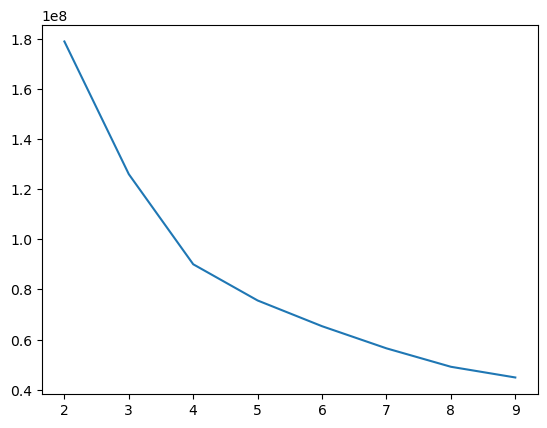

In [47]:
n_clusters = list(range(2, 10))
x = df.copy()
metrics = []

for k in n_clusters:
    km = KMeans(n_clusters=k).fit(x)
    metrics.append(km.inertia_)

sns.lineplot(n_clusters, metrics)

C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


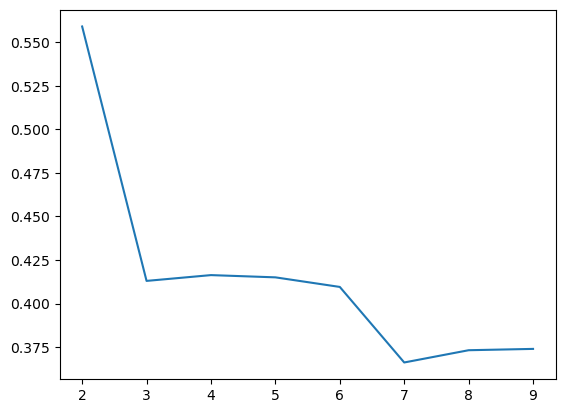

In [48]:
data = df.copy()
n_clusters = list(range(2, 10))
metrics = []
for k in n_clusters:
    km = KMeans(n_clusters=k).fit(data)
    score = silhouette_score(data, km.labels_)
    metrics.append(score)
sns.lineplot(n_clusters, metrics);

Метод локтя определил количество кластеров равным 4, но аналитический метод максимум показал при k = 2. Я считаю, что лучше испольовать количество кластеров равное 4, т.к. на два кластера мы и так можем разделить данные, например по колонке Response.

# Задание 5

Визуализируйте результаты кластеризации на двумерном графике с помощью метода t-SNE. Обоснуйте выбранные значения его гиперпараметров.

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 2


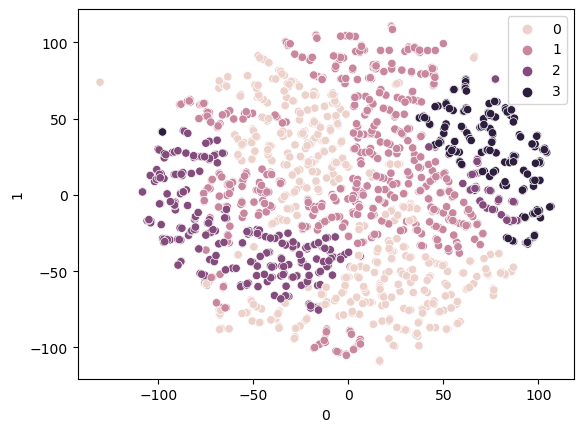

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 4


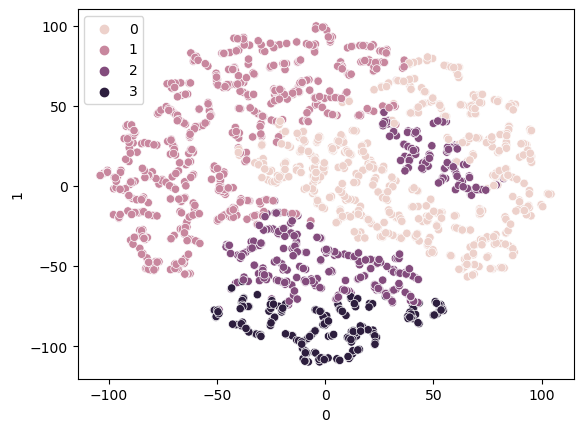

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 6


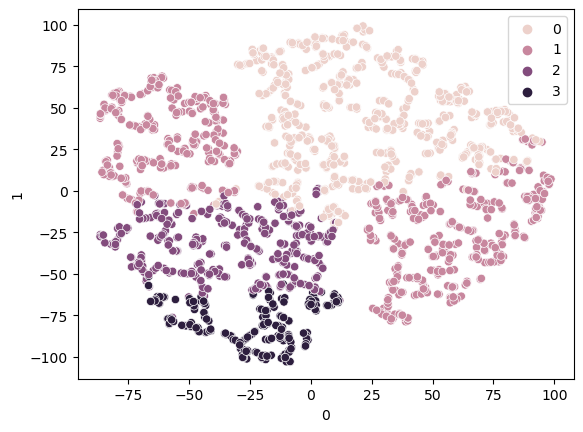

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 8


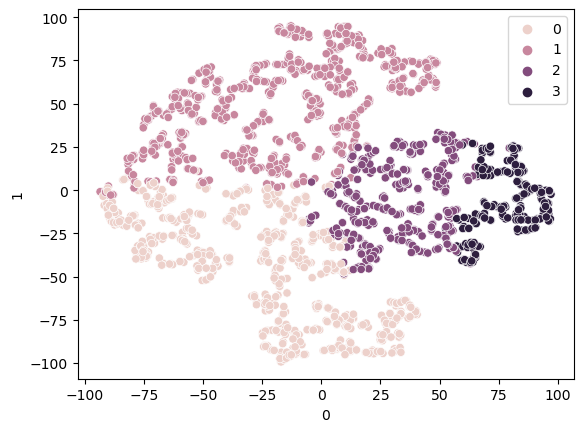

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 10


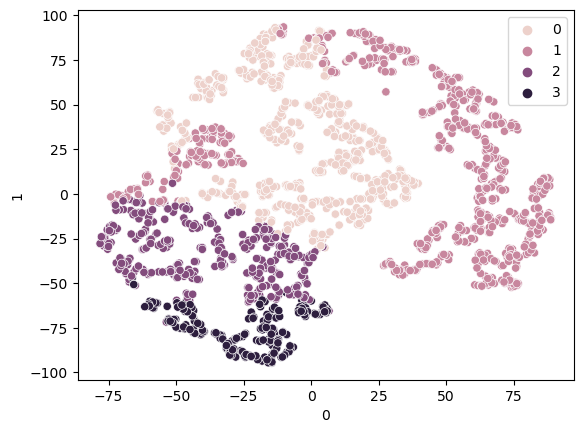

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 12


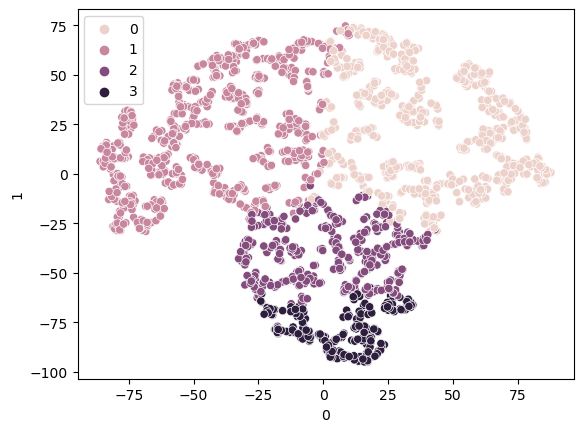

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 14


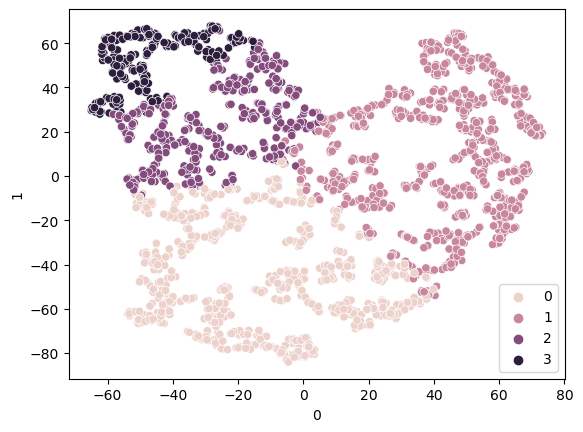

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 16


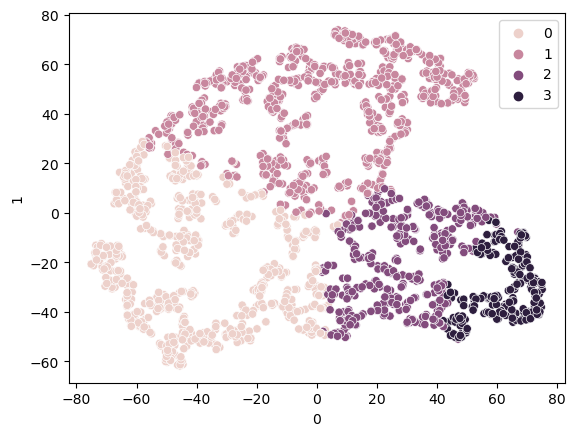

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 18


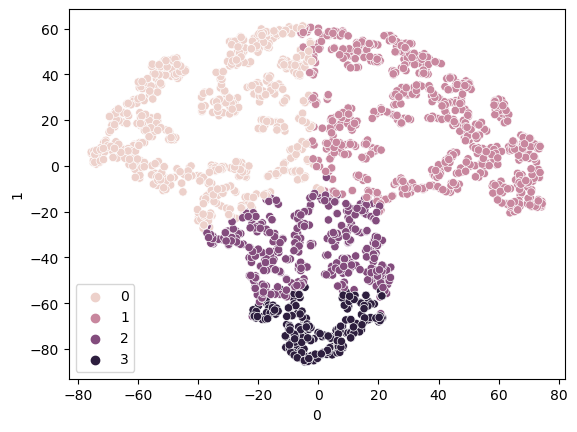

C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Msi-1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 20


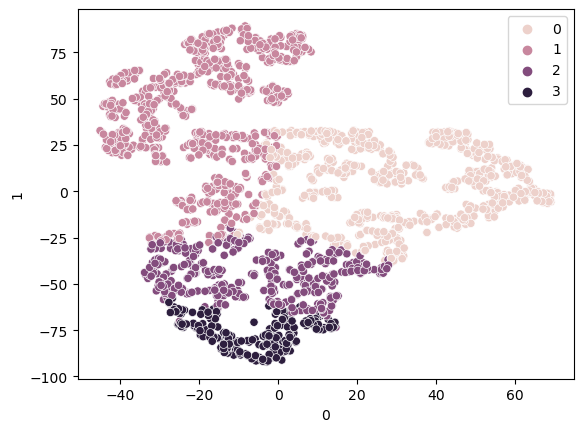

In [22]:
km = KMeans(n_clusters=4).fit(df)
labels = km.labels_

for i in range(2, 21, 2):
    tsne = TSNE(n_components=2, perplexity=i)
    df_emb = tsne.fit_transform(df)
    data = pd.DataFrame(df_emb)
    sns.scatterplot(data[0], data[1], hue=labels)
    print ('perplexity = ' + str(i))
    plt.show()

In [49]:
km = KMeans(n_clusters=4).fit(df)
labels = km.labels_
df_ = df.copy()
df['color'] = np.array(labels)
silhouette_score(df_, df['color'])

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_4436\891158637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = np.array(labels)


0.4163639775653483

На мой взгляд значение perplexity=20 наиболее подходит для данной выборки.

# Задание 6

Постройте профили кластеров и опишите их.

In [23]:
df['color'] = np.array(labels)
df

C:\Users\Msi-1\AppData\Local\Temp\ipykernel_4436\2631536252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = np.array(labels)


,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,MntProducts,Purchases,color
0,66,3818,58,88,546,172,88,8,4,1,894,12,3
1,69,3268,38,1,6,2,1,1,2,0,10,3,1
2,58,3467,26,49,127,111,21,8,10,0,308,18,2
3,39,3294,26,4,20,10,3,2,4,0,37,6,1
4,42,3316,94,43,118,46,27,5,6,0,234,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,56,3536,46,43,182,42,118,9,4,0,385,13,2
2236,77,3174,56,0,30,0,0,8,5,0,30,13,1
2237,42,3310,91,48,217,32,12,2,13,0,309,15,1
2238,67,3311,8,30,214,80,30,6,10,0,354,16,2


In [24]:
features = df.drop(columns=['color']).columns

df_g = df.groupby('color').agg({x: ['mean', 'std'] for x in features}).T
df_g

color                             0            1            2            3
Year_Birth        mean    53.837981    53.545900    55.405594    54.620690
                  std     11.312077    11.052378    12.442525    13.421347
Dt_Customer       mean  3684.292165  3335.484700  3515.076923  3534.637931
                  std     98.686720   105.953641   195.608316   210.476882
Recency           mean    49.009296    48.921665    49.846154    49.142241
                  std     28.639657    28.993428    29.140645    29.449076
MntFruits         mean    11.634794     7.208078    61.244755    77.418103
                  std     17.975255    12.559985    46.861780    52.456638
MntMeatProducts   mean    63.492696    38.690330   304.482517   670.745690
                  std     59.547520    45.446568   106.729209   150.059959
MntFishProducts   mean    16.179283     9.593635    88.244755   112.650862
                  std     24.254436    15.590151    59.005728    70.487195
MntSweetProducts  mean    11.691899     7.097919    63.396270    78.788793
                  std     18.839698    12.400989    46.755145    54.322376
NumWebPurchases   mean     3.994688     2.913097     5.766900     5.112069
                  std      2.719115     2.167278     2.459338     1.850572
NumStorePurchases mean     5.033201     4.307222     8.738928     8.228448
                  std      2.854208     2.422294     2.881929     2.621004
Response          mean     0.171315     0.051408     0.170163     0.387931
                  std      0.377034     0.220963     0.376215     0.488332
MntProducts       mean   102.998672    62.589963   517.368298   939.603448
                  std     93.024283    71.699926   120.596181   162.802134
Purchases         mean     9.027888     7.220318    14.505828    13.340517
                  std      4.965628     4.183643     3.802125     3.306886

In [25]:
functions = ['mean', 'std']

stat = np.array([[df[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
df_g_rel

color                             0            1            2            3  \
Year_Birth        mean    53.837981    53.545900    55.405594    54.620690   
                  std     11.312077    11.052378    12.442525    13.421347   
Dt_Customer       mean  3684.292165  3335.484700  3515.076923  3534.637931   
                  std     98.686720   105.953641   195.608316   210.476882   
Recency           mean    49.009296    48.921665    49.846154    49.142241   
                  std     28.639657    28.993428    29.140645    29.449076   
MntFruits         mean    11.634794     7.208078    61.244755    77.418103   
                  std     17.975255    12.559985    46.861780    52.456638   
MntMeatProducts   mean    63.492696    38.690330   304.482517   670.745690   
                  std     59.547520    45.446568   106.729209   150.059959   
MntFishProducts   mean    16.179283     9.593635    88.244755   112.650862   
                  std     24.254436    15.590151    59.005728    70.487195   
MntSweetProducts  mean    11.691899     7.097919    63.396270    78.788793   
                  std     18.839698    12.400989    46.755145    54.322376   
NumWebPurchases   mean     3.994688     2.913097     5.766900     5.112069   
                  std      2.719115     2.167278     2.459338     1.850572   
NumStorePurchases mean     5.033201     4.307222     8.738928     8.228448   
                  std      2.854208     2.422294     2.881929     2.621004   
Response          mean     0.171315     0.051408     0.170163     0.387931   
                  std      0.377034     0.220963     0.376215     0.488332   
MntProducts       mean   102.998672    62.589963   517.368298   939.603448   
                  std     93.024283    71.699926   120.596181   162.802134   
Purchases         mean     9.027888     7.220318    14.505828    13.340517   
                  std      4.965628     4.183643     3.802125     3.306886   

color                        Global  
Year_Birth        mean    54.113850  
                  std     11.692531  
Dt_Customer       mean  3508.456746  
                  std    202.004972  
Recency           mean    49.151950  
                  std     28.933242  
MntFruits         mean    26.393994  
                  std     39.826241  
MntMeatProducts   mean   163.897804  
                  std    214.817139  
MntFishProducts   mean    37.657104  
                  std     54.698590  
MntSweetProducts  mean    26.929180  
                  std     40.734703  
NumWebPurchases   mean     4.055580  
                  std      2.624232  
NumStorePurchases mean     5.812192  
                  std      3.238800  
Response          mean     0.149709  
                  std      0.356866  
MntProducts       mean   254.878082  
                  std    306.110500  
Purchases         mean     9.867772  
                  std      5.179383

In [26]:
cluster_labels = [0, 1, 2, 3]

for i in cluster_labels:
  df_g_rel[i] = 100 * df_g_rel[i] / df_g_rel['Global'] - 100

df_g_rel

color                           0          1           2           3  \
Year_Birth        mean  -0.509793  -1.049548    2.387086    0.936617   
                  std   -3.253825  -5.474889    6.414295   14.785644   
Dt_Customer       mean   5.011760  -4.930146    0.188692    0.746231   
                  std  -51.146390 -47.548993   -3.166584    4.193911   
Recency           mean  -0.290230  -0.468517    1.412363   -0.019752   
                  std   -1.014698   0.208015    0.716833    1.782841   
MntFruits         mean -55.918781 -72.690460  132.040501  193.317125   
                  std  -54.865800 -68.463042   17.665587   31.713758   
MntMeatProducts   mean -61.260801 -76.393625   85.775838  309.246295   
                  std  -72.279902 -78.844068  -50.316250  -30.145257   
MntFishProducts   mean -57.035244 -74.523704  134.337601  199.149028   
                  std  -55.658024 -71.498075    7.874313   28.864739   
MntSweetProducts  mean -56.582788 -73.642275  135.418498  192.577768   
                  std  -53.750252 -69.556698   14.779637   33.356504   
NumWebPurchases   mean  -1.501451 -28.170660   42.196655   26.050242   
                  std    3.615650 -17.412864   -6.283546  -29.481409   
NumStorePurchases mean -13.402712 -25.893335   50.355115   41.572207   
                  std  -11.874521 -25.210130  -11.018619  -19.074830   
Response          mean  14.432092 -65.661578   13.662884  159.123993   
                  std    5.651595 -38.082316    5.421992   36.839274   
MntProducts       mean -59.589043 -75.443175  102.986579  268.648195   
                  std  -69.610881 -76.577110  -60.603710  -46.815894   
Purchases         mean  -8.511383 -26.829298   47.002049   35.192796   
                  std   -4.127023 -19.225061  -26.591148  -36.152897   

color                        Global  
Year_Birth        mean    54.113850  
                  std     11.692531  
Dt_Customer       mean  3508.456746  
                  std    202.004972  
Recency           mean    49.151950  
                  std     28.933242  
MntFruits         mean    26.393994  
                  std     39.826241  
MntMeatProducts   mean   163.897804  
                  std    214.817139  
MntFishProducts   mean    37.657104  
                  std     54.698590  
MntSweetProducts  mean    26.929180  
                  std     40.734703  
NumWebPurchases   mean     4.055580  
                  std      2.624232  
NumStorePurchases mean     5.812192  
                  std      3.238800  
Response          mean     0.149709  
                  std      0.356866  
MntProducts       mean   254.878082  
                  std    306.110500  
Purchases         mean     9.867772  
                  std      5.179383

# Задание 7

Визуализируйте профили кластеров. Подготовьте краткое резюме результатов вашего исследования для заказчика.

<AxesSubplot:xlabel='color', ylabel='None-None'>

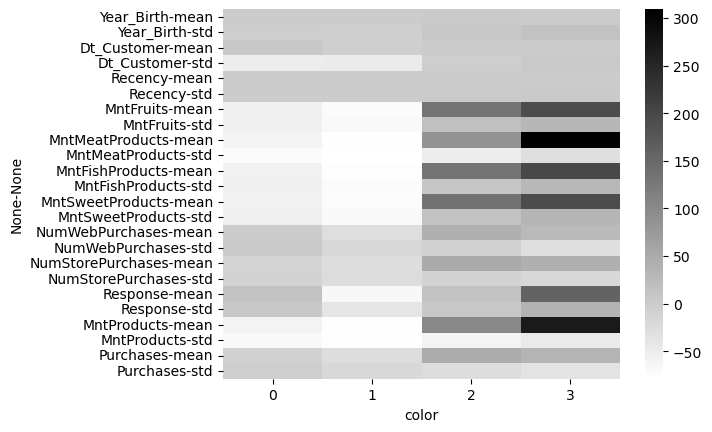

In [27]:
sns.heatmap(df_g_rel[cluster_labels], cmap='binary')

Характеристика кластеров. Отличий по возрасту, времени регистрации, и по последней покупке не выявлено.

0: Эта группа меньше всего покупает, но и меньше всех учавствовало в рекламных компаниях. Рекомендация усилить рекламную компанию на эту группу клиентов.

1: Эта группа покупает достаточно много, уровень участвовали в реламных компаниях достаточно часто, больше остальных покупает через web. Рекомендация усилить web рекламу.

2: Эта группа покупает больше всех, активнее всех участвовала в реламных компаниях. Целевая аудитория. Необходимо ее удерживать, возможно предаставление дополнительных скидок.

3: Не смотря на активность в рекламных компаниях группа показала низкую покупательную способность. Не целевая аудитория. Рекомендация рекламную компанию в отношении этой группы снизить.